# sklearn

## k-means clustering


In [2]:
import numpy as np
import pandas as pd

# load data
iris_data = pd.read_csv('./dataset/iris/iris.csv')
iris_data

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.model_selection import train_test_split


# Split the data into training and testing sets
X, y = iris_data.iloc[:, :-1], iris_data.iloc[:, -1]
X, y = X.to_numpy(), y.to_numpy()

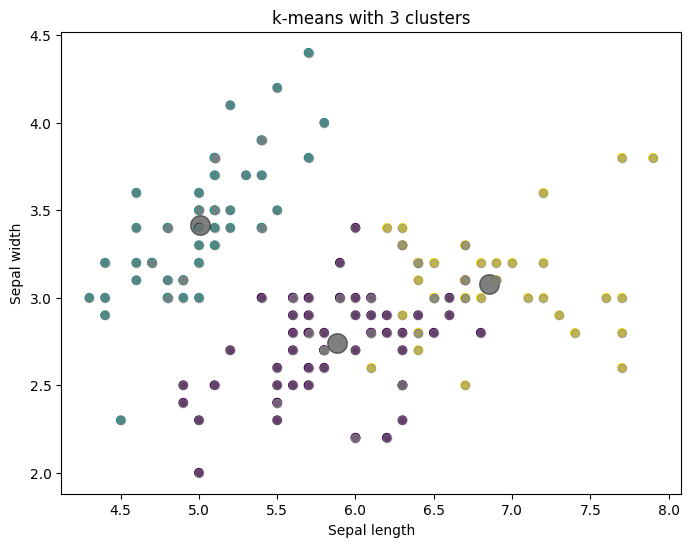

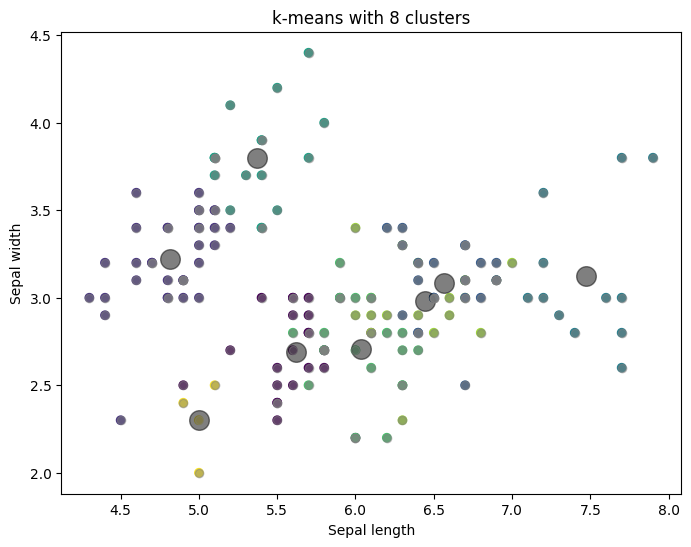

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# estimator of 3 clusters and 8 clusters
estimators = [
    ("k-means with 3 clusters", KMeans(n_clusters=3, random_state=0)),
    ("k-means with 8 clusters", KMeans(n_clusters=8, random_state=0)),
]

for title, est in estimators:
    # fit
    est.fit(X)
    labels = est.predict(X)
    # plot
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")
    centers = est.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c="black", s=200, alpha=0.5)
    plt.title(title)
    # original data
    plt.scatter(X[:, 0], X[:, 1], c="gray", alpha=0.5)
    plt.show()

---------------------
calculate the accuracy of situation (n_clusters=3)

In [7]:
from sklearn.cluster import KMeans

y2int = y.copy()
y2int[y2int == "Iris-setosa"] = 1
y2int[y2int == "Iris-versicolor"] = 0
y2int[y2int == "Iris-virginica"] = 2
y2int = y2int.astype(int)

km = KMeans(n_clusters=3, random_state=0)
km.fit(X)
accuracy = np.mean(y2int == km.labels_)
print("k-means Accuracy:", f"{accuracy}")

k-means Accuracy: 0.8866666666666667


# DBSCAN


In [70]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=20)
labels = dbscan.fit_predict(X).astype(int)
np.unique(labels, return_counts=True)

(array([-1,  0,  1,  2]), array([29, 48, 58, 15]))

In [71]:
y2int = y.copy()
y2int[y == 'Iris-setosa'] = 0
y2int[y == 'Iris-versicolor'] = 1
y2int[y == 'Iris-virginica'] = -1

accuracy = np.mean(y2int == labels)
print("DBSCAN accuracy:", accuracy)

DBSCAN accuracy: 0.74


it's hard to find a best parameter for DBSCAN.

In [ ]:
# 